In [15]:
import pandas as pd
X_train = pd.read_csv("breast-cancer-X_train.csv")
y_train = pd.read_csv("breast-cancer-y_train.csv")
X_train.head

<bound method NDFrame.head of      Unnamed: 0  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0           345        0.0     0.155190      0.169090        0.154861   
1           319        0.0     0.257892      0.246534        0.240550   
2            72        1.0     0.483648      0.500845        0.486559   
3           298        0.0     0.344503      0.286101        0.327759   
4           568        0.0     0.036869      0.501522        0.028540   
..          ...        ...          ...           ...             ...   
507         456        0.0     0.220029      0.662158        0.214774   
508         360        0.0     0.263098      0.282719        0.246217   
509         439        0.0     0.333144      0.201217        0.316495   
510         174        0.0     0.174121      0.183970        0.163776   
511         122        1.0     0.817313      0.354751        0.845899   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     0.075546         0

In [16]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
result = []
for i in range(1,60):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train, y_train)
    s = make_scorer(f1_score, pos_label='bad')
    scores = cross_val_score(modelK, X_train, y_train, cv=5, scoring=s)
    f1 = scores.mean()
    result.append((i, f1))

TypeError: '<' not supported between instances of 'str' and 'int'

[]

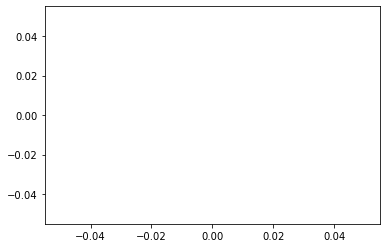

In [5]:
import matplotlib.pyplot as plt
plt.plot(*zip(*result))

In [6]:
result[0:5]

[]

In [8]:
modelK = KNeighborsClassifier(n_neighbors=2)
modelK.fit(X_train, y_train)
s = make_scorer(f1_score, pos_label='bad')
scores = cross_val_score(modelK, X_train, y_train, cv=5, scoring=s)
y_pred = cross_val_predict(modelK, X_train, y_train, cv=5)
print("f1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

ValueError: could not convert string to float: 'B'

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_train, y_pred))

NameError: name 'y_pred' is not defined